# Assessment of Operating Envelopes to Orchestrate DERs
# OE Algorithm 1: Ideal


This notebook can be run in **Google Colab**. Click on the button below.

<a target="_blank" href="https://colab.research.google.com/github/Team-Nando/OE1-Ideal/blob/feature/colab-version/OE1-Ideal.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Table of Contents
1. [Introduction](#Introduction)
2. [Algorithm Overview](#Algorithm-Overview)
3. [Inputs and Outputs for the OE Calculation Algorithm](#Inputs-Outputs)
4. [Case Study: Test LV Network](#Case-Study)
5. [Interactive Code](#Interactive-Code)

## 1. Introduction
<a name="Introduction"></a>
This work is part of the project [Assessing the Benefits of Using Operating Envelopes to Orchestrate DERs Across Australia](https://electrical.eng.unimelb.edu.au/power-energy/projects/assessing-the-benefits-of-OEs-across-Australia) funded by CSIRO. This project provided key metrics and recommendations for distribution companies (known as Distribution Network Service Providers [DNSPs] in Australia) and AEMO (the Australian system operator) to assist them in their decision-making process when defining the most suitable Operating Envelope (OE) implementations in a given distribution area.

> <span style="color:purple">**What are Operating Envelopes (OEs)?** OEs are time-varying export or import limits calculated in real time or in advance at the connection point of the customer to ensure the integrity of the distribution network (i.e., customer voltages within limits and no asset congestion). The OEs are calculated only for customers with flexible connection agreements (called here *active customers*). Customers with conventional connection agreements (called here *passive customers*) do not require OEs.</span>

**This interactive notebook demonstrates the process to implement the *Ideal OE Algorithm*** produced by The University of Melbourne. This demonstration is useful for different stakeholders (e.g., DNSPs, AEMO, CSIRO, regulators, consultancy companies, technology providers) as it can help them familiarise with the corresponding algorithm and the required inputs as well as the pros and cons.

> <span style="color:purple">The **Ideal OE** is the most advanced and, hence, the most accurate operating envelope approach as it uses power flows to carry out calculations. However, it needs a full electrical network model and full monitoring of customers, which makes its implementation complex. If the electrical model and monitoring data are correct, it can guarantee the operation of the network within technical limits (i.e., voltage and thermal) as well as the maximum possible export and/or import limits. Therefore, this operating envelope is used as a benchmark for the simpler ones studied in the project.</span>
> - Monitoring: At the secondary of the transformer (P, Q, and V, all per phase), at all customers (net demand P and Q).
> - Electrical models needed: Full electrical network model.

## 2. Algorithm Overview
<a name="Algorithm-Overview"></a>
The **Ideal OE** uses a perfect electrical network model of a given LV network together with the time-varying input data from the network and customers to carry out heuristic algorithms. These algorithms consist of a series of power flows calculations exploring exports/imports up to the point that a network limit (voltages or thermal) in any part of the LV network is breached. Two allocation techniques are used for the Ideal OE, as presented below. Note that for calculations in advance (e.g., hours ahead), forecasting capabilities are also needed (however, here, perfect forecasting is used for simplicity).

### Proportional Allocation
For a given point in time (e.g., at 12:00PM), the high-level steps of the algorithm are as follows:
1. **Set up the network for power flow simulations for OE exports (or imports)**. This is done by using the LV electrical network model together with the voltage at the LV head of feeder and the net demand from passive customers (P, Q) and active customers (Q). Also set the net active power of all active customers to the maximum possible value for OE export (or imports). For OE exports, it could be the aggregated size of the DERs in the active customer (e.g., PV + battery with a total power of 10kW). For OE imports, it could be the fuse of the customer (e.g., 60A fuse for a single-phase customer, giving a total power of 14kW).
2. **Run the power flow**.
3. **Check for voltage and thermal issues in the whole network for the OE exports (or imports)**. If any network limit is breached (voltage or thermal), reduce the net active power of all active customers by a pre-defined value (e.g., 1kW), then go back to step 2. Otherwise, the current net active power of the active customers correspond to the OE exports (or imports), thus proceed to step 4.
4. **Move to the next time step (e.g., 12:05PM) and restart the process from 1**.

### Maximum Allocation
1. **Set up the network for power flow simulations for OE exports (or imports)**. This is done by using the LV electrical network model together with the voltage at the LV head of feeder and the net demand from passive customers (P, Q) and active customers (Q). Also set the net active power of all active customers to the maximum possible value for OE export (or imports). For OE exports, it could be the aggregated size of the DERs in the active customer (e.g., PV + battery with a total power of 10kW). For OE imports, it could be the fuse of the customer (e.g., 60A fuse for a single-phase customer, giving a total power of 14kW).
2. **Run the power flow**.
3. **Check for thermal issues on the distribution transformer and lines for the OE exports (or imports)**. If any thermal limit is breached, reduce the net active power of all active customers by a pre-defined value (e.g., 1kW), then go back to step 2. Otherwise, proceed to step 4.
4. **Check for voltage issues on customers for OE exports (or imports)**. If any voltage limit is breached, find the most affected (with the higher voltage) active customer and reduce its net active power by a pre-defined value (e.g., 1kW), then go back to step 2. Otherwise, the current net active power of the active customers correspond to the OE exports (or imports), thus proceed to step 5.
5. **Move to the next time step (e.g., 12:05PM) and restart the process from 1**.

<span style="color:red">**<u>Note 1</u>.</span>** The OE exports and OE imports are calculated separately. When calculating exports, all active customers are considered to export. When calculating imports, all active customers are considered to import. This ensures the asset integrity even if all active customers operate at their maximum allocated OE capacity (worst case scenario).

<span style="color:red">**<u>Note 2</u>.</span>** For OE calculations in real-time no forecast is needed, real-time measurements from the network/customers should be used instead.

<span style="color:red">**<u>Note 3</u>.</span>** The OE values are calculated for the active power only. The reactive power of PV systems are considered to be zero all the time.

## 3. Inputs and Outputs for the OE Calculation Algorithm
<a name="Inputs-Outputs"></a>
### 3.1. Inputs
#### 3.1.1 Time-Varying Inputs
- Forecasted voltage magnitude at the LV head of feeder (or secondary of the distribution transformer).
- Forecasted net demand (P, Q) of all passive customer.
- Forecasted net demand (Q) of all active customers.

#### 3.1.2. Static Inputs
- Accurate full electrical model of the LV network (i.e., topology, phase connection of assets and customers, and impedance of conductors).
- Rated capacity of the distribution transformer and LV lines.

### 3.2. Outputs
- The OEs for exports and imports.

## 4. Case Study: Test LV Network
<a name="Case-Study"></a>
To demonstrate the OE algorithm, the realistic Test LV network shown in Figure 1 is used. This network has the following characteristics:
- Three 3-phase LV feeders.
- 114 single-phase residential customers connected via service cables.
- 16 (out of 114) are active customers (around 15%).
- 98 (out of 114) are passive customers.
- 35 of passive customers have PV systems (a PV penetration of 30% for the whole LV network).
- The PV systems have the same installed capacity of 5kVA. They also have the combined Volt-Watt and Volt-Var functions enabled.
- All active customers have the same DER installed capacity of 10kVA (e.g., PV + battery).

<span style="color:red">**<u>Note</u>.</span>** For simplicity, the case study used to demonstrate the OE algorithm corresponds to a low voltage (LV) network without modelling the upstream high voltage (HV) network. Although some adaptations have been made to ensure realistic voltage fluctuations at the distribution transformer of the LV network, the results are not exactly the same as those presented in the Final Report of the project (which used an integrated HV-LV network model). Nevertheless, the behaviour of the OE algorithm and the qualitative nature of the results remain the same. The following adaptions were made:
- The voltage variation along the day caused by the HV part is modelled as a voltage source (following the values taken from the full HV-LV model).
- To better represent the voltage rise/drop at the primary side of the distribution transformer (due to OE exports/imports), a fictitious line is created between the voltage source and the distribution transformer.

<img style="float: middle;" src="https://github.com/aavilarojas28/OE_algorithms/blob/main/OE_LV/OE1-Ideal/LV_Network.SVG?raw=1" width="100%">  

**<center>Figure 1. Test LV Network</center>**   

## 5. Interactive Code
<a name="Interactive-Code"></a>
<span style="color:red">**<u>Note</u>.</span>** This interactive notebook is designed to facilitate the learning/teaching of the content. Therefore, the definitions of functions are not made at the beginning of the notebook as it is usually done when just coding.

This section contains the following subsections:
- [5.1. Initialisation of Libraries and OpenDSS](#Initialisation-of-Libraries-and-OpenDSS)
- [5.2. Definition of Functions](#Definition-of-Functions)
- [5.3. Main Code: Execution & Analysis](#Main-Code)

### 5.1. Initialisation of Libraries and OpenDSS
<a name="Initialisation-of-Libraries-and-OpenDSS"></a>

<span style="color:red">**<u>Note</u>.</span>** The code cells in this subsection can be run just once.

In [1]:
import os, subprocess
from matplotlib import pyplot as plt # for plotting
import numpy as np # for numerical operations

In the next code cell, the OpenDSS library is imported. It contains a validation in case the code is run in <a href="https://colab.google/">Google Colaboratory</a>.

In [2]:
# Verify if the variable to set the environment in Google Colab exists
added_path = ""
if os.getenv("COLAB_RELEASE_TAG"):
    !git clone --depth=1 -q https://github.com/Team-Nando/OE1-Ideal
    !pip install dss-python==0.14.1
    added_path = '/OE1-Ideal'
import dss

The next code cell is used to initialise the OpenDSS engine.

In [3]:
dss_engine = dss.DSS
dss_text = dss_engine.Text
dss_circuit = dss_engine.ActiveCircuit
dss_solution = dss_engine.ActiveCircuit.Solution
control_queue = dss_engine.ActiveCircuit.CtrlQueue
dss_engine.AllowForms = 0

### 5.2. Definition of Functions
<a name="Definition-of-Functions"></a>
This section contains the definition of the functions used in the notebook. It contains the following structure:
- [5.2.1. OpenDSS Interaction Functions](#opendss-functions)
- [5.2.2. OE Calculation Functions](#oe-functions)
- [5.2.3. Results Analysis Functions](#results-functions)

#### 5.2.1. OpenDSS Interaction Functions
<a name="opendss-functions"></a>

This section contains the definition of the functions that interact with the OpenDSS model. It contains the following functions:
- `load_network`: load the network from opendss
- `update_vsource`: update the voltage source
- `reset_active_customers`: reset the active customers

In [4]:
def load_network(path = None, time_res = 5):
    """
    load the network from opendss
    :param path: path to the OpenDSS model
    :param time_res: time resolution of the data in minutes
    :return: load_list: list of loads
    """
    # load the entire LV network with transformer, feeders, loads, PV systems, PV inverter settings, demands, PV generation
    dss_text.Command = 'Clear'
    dss_text.Command = 'Compile ' + path
    dss_text.Command = 'Set VoltageBases=[22.0, 0.400]'
    dss_text.Command = 'calcv'
    dss_text.Command = 'Set ControlMode=static'
    dss_text.Command = 'Reset'
    dss_text.Command = 'Set Mode=daily number=1 stepsize='+str(time_res)+'m'

    # load LV network data from the OpenDSS model
    loads = dss_circuit.Loads.AllNames # list of loads

    return loads

In [5]:
def update_vsource(t):
    """
    update the voltage source to simulate the primary side of the distribution transformer. The magnitude and angle are updated using the forecasted values
    :param t: time step
    :return: None
    """
    vpu1 = tx_pri_voltages_day[0][t] / tx_rating_ln
    angle1 = tx_pri_angles_day[0][t]
    vpu2 = tx_pri_voltages_day[1][t] / tx_rating_ln
    angle2 = tx_pri_angles_day[1][t]
    vpu3 = tx_pri_voltages_day[2][t] / tx_rating_ln
    angle3 = tx_pri_angles_day[2][t]
    dss_text.Command = f'edit vsource.source bus1=sourcebus.1 basekv={str(tx_rating_ln/1000)} pu={str(vpu1)} angle={str(angle1)} phases=1'
    dss_text.Command = f'edit vsource.source2 bus1=sourcebus.2 basekv={str(tx_rating_ln/1000)} pu={str(vpu2)} angle={str(angle2)} phases=1'
    dss_text.Command = f'edit vsource.source3 bus1=sourcebus.3 basekv={str(tx_rating_ln/1000)} pu={str(vpu3)} angle={str(angle3)} phases=1'

In [6]:
def reset_active_customers():
    """
    reset the active customers to their default values and the status to 'variable'
    :return: None
    """
    for active_cust in names_active_cust:
        dss_circuit.SetActiveElement('load.' + str(active_cust))
        dss_circuit.ActiveElement.Properties('status').Val = 'variable'
        dss_circuit.ActiveElement.Properties('kw').Val = str(default_kw_kvar)
        dss_circuit.ActiveElement.Properties('kvar').Val = str(default_kw_kvar)

#### 5.2.2. OE Calculation Functions
<a name="oe-functions"></a>

This section contains the definition of the function that calculates the ideal OE. The main function is called `ideal_oe_algorithm`. In the following subsections the functions used in the main function are described.

In [7]:
def ideal_oe_algorithm(
        active_customers,
        allocation_method = 'proportional',
        direction = 'exports',
        allocation_limit = None,
        voltage_limit = None, # statutory voltage limit to check against (+10% or -6% from the nominal line-to-neutral voltage of 230V)
        oe_step_size_percentage = 0.05 # chosen step size to reduce the OE values in percentage
):
    """
    Function to calculate the Ideal OE proportional allocation for exports in each time step.
    This is used in all time steps of the day.
    :param active_customers: list of the names of the active customers
    :param allocation_method: it indicates if the algorithm is proportional or maximum allocation
    :param direction: it indicates if the algorithm is for exports or imports
    :param allocation_limit: the maximum power that can be allocated
    :param voltage_limit: the value to being checked against (+10% or -6% from the nominal line-to-neutral voltage of 230V)
    :param oe_step_size_percentage: the step size to reduce the OE values in percentage
    :return: ideal_oe_values: the calculated ideal OE value for the method allocation and direction
    :return: lv_tx_util: the transformer utilisation when using the calculated OE value
    :return: lv_hof_util_max: the maximum utilisation of the LV head of feeder when using the calculated OE value
    :return: volt_all_cust_temp: voltages on all customers when using the calculated OE value
    """

    # -------- initialise output variables -----------
    flag = 0 # flag to indicate if the net active power of all active customers correspond to the OE exports (or imports)
    lv_tx_util = 0 # the transformer utilisation when using the calculated OE value
    lv_hof_util_max = 0 # the maximum utilisation of the LV head of feeder when using the calculated OE value
    volt_all_cust_temp = []
    
    # set the allocation limit to 10kW or 14kW depending on the direction
    limit_value = max_export_limit if direction == 'exports' else max_import_limit
    oe_step_size = limit_value * oe_step_size_percentage

    # -------- initialise inputs -----------
    if voltage_limit is None:
        # set the voltage limit to 253 or 216 depending on the direction
        voltage_limit = max_voltage_limit if direction == 'exports' else min_voltage_limit
    
    if allocation_limit is None:
        allocation_limit = limit_value if allocation_method == 'proportional' else np.ones(len(active_customers)) * limit_value

    # -------- load LV network data from the OpenDSS model -----------
    load_list = dss_circuit.Loads.AllNames # list of loads
    line_list = dss_circuit.Lines.AllNames # list of lines

    while flag == 0:
        # implement the allocated OE value to each active customer
        for ild in range(len(active_customers)):
            dss_circuit.SetActiveElement('load.' + str(active_customers[ild])) # select an active customer
            temp = dss_circuit.ActiveElement.Powers[1] # save the current reactive power of the active customer
            dss_circuit.ActiveElement.Properties('status').Val = 'fixed' # fix the load status to run with the set value instead of profile
            # set the kW to the allocated OE value
            allocation_value = allocation_limit if allocation_method == 'proportional' else allocation_limit[ild] # determine if the value is from proportional or maximum
            new_kw = -1 * allocation_value if direction == 'exports' else allocation_value # determine if the value is positive or negative, according to the direction
            dss_circuit.ActiveElement.Properties('kw').Val = str(new_kw) # set the kW to the allocated OE value
            dss_circuit.ActiveElement.Properties('kvar').Val = str(temp) # set the kvar to be the same as before

        dss_solution.SolveSnap() # solve the power flow in OpenDSS without changing the time of the day

        # --------------- verify thermal issues for all lines ----------------
        # get the flag for thermal issues and the thermal issues on all lines
        flag_thermal_line, lv_hof_util_max = validate_thermal_lines(lines=line_list)
        if allocation_method == 'maximum':
            allocation_limit = update_oe_value_by_issue(flag_issue=flag_thermal_line, allocation_limit=allocation_limit, oe_step_size=oe_step_size)
            if (allocation_limit == 0).all(): break # if all active customers are below zero, the OE value is zero. No more optimization is needed.



        # --------------- verify thermal limits of transformer ----------------
        # get the flag for thermal issues and the thermal issues on all lines
        flag_thermal_tx, lv_tx_util = validate_thermal_transformer()
        if allocation_method == 'maximum':
            allocation_limit = update_oe_value_by_issue(flag_issue=flag_thermal_tx, allocation_limit=allocation_limit, oe_step_size=oe_step_size)
            if (allocation_limit == 0).all(): break # if all active customers are below zero, the OE value is zero. No more optimization is needed.

        # --------------- verify voltages on all customers ----------------
        # get the flag for voltage issues and the voltage on all customers
        if allocation_method == 'proportional':
            # the voltage is verified with the proportional algorithm
            flag_voltage, volt_all_cust_temp = validate_voltage_customers_prop(loads=load_list, voltage_limit=voltage_limit, direction=direction)
        else:
            # the voltage is verified with the maximum algorithm
            flag_voltage, volt_all_cust_temp, allocation_limit = validate_voltage_customers_max(
                                                                                                    loads=load_list,
                                                                                                    voltage_limit=voltage_limit,
                                                                                                    direction=direction,
                                                                                                    allocation_limit=allocation_limit,
                                                                                                    oe_step_size=oe_step_size
                                                                                                )

        # --------------- check if any technical issue was found in the network -----------
        flag = flag_thermal_line * flag_voltage * flag_thermal_tx # flag to indicate when there is a technical problem (0 = problems; 1 = no problems)

        # -------------- update the allocation limit for the next time step, if the allocation method is proportional ---------------
        if allocation_method == 'proportional':
            if flag == 0:
                allocation_limit -= oe_step_size # if above any limit, reduce the allocated OE by 0.5kW (pre-defined reduction step)

                # check if the OE has achieved the minimum possible OE value (zero)
                if allocation_limit < 0:
                    allocation_limit = 0 # if below zero, allocate zero as OE value
                    break # voltage problems are still expected even after OE value is equal to zero. OE calculation finished.

    ideal_oe_values = allocation_limit # rename the allocated OE value

    return ideal_oe_values, lv_tx_util, lv_hof_util_max, volt_all_cust_temp # return the calculated OE value for the export for the considered time step

##### 5.2.2.1. Validate issues in the network
This subsection contains the functions that verify the issues in the network for the OE calculation.

###### 5.2.2.1.1. Validate Thermal Issues
This function verify the thermal issues in the lines of the network.

In [8]:
def validate_thermal_lines(lines):
    """
    This function verify the thermal issues in the lines of the network.
    :param lines: the list of lines
    :return: the flag for thermal issues
    :return: the maximum utilisation of the head of feeder lines
    """
    # initialise variables
    flag_thermal_line = 0 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
    lv_hof_util_f0 = 0
    lv_hof_util_f1 = 0
    lv_hof_util_f2 = 0

    # verify each line for thermal issues
    for line in lines:
        dss_circuit.SetActiveElement('line.' + str(line)) # select a line

        # extract the current passing through the lines in phases A, B, and C
        Ia_line = max(dss_circuit.ActiveCktElement.CurrentsMagAng[0], dss_circuit.ActiveCktElement.CurrentsMagAng[6])
        Ib_line = max(dss_circuit.ActiveCktElement.CurrentsMagAng[2], dss_circuit.ActiveCktElement.CurrentsMagAng[8])
        Ic_line = max(dss_circuit.ActiveCktElement.CurrentsMagAng[4], dss_circuit.ActiveCktElement.CurrentsMagAng[10])

        # extract the rated current of the corresponding line
        I_rated = dss_circuit.Lines.NormAmps 

        # find the maximum per phase current passing through the line
        I_max_line_temp = max(Ia_line, Ib_line, Ic_line)

        # check if the line current is above the rated current of the corresponding line
        if I_max_line_temp <= I_rated:
            flag_thermal_line = 1

            # calculate the utilisation of the head of each feeder (there are 3 feeders in this LV network)
            if line == 'hv_f0_lv28_f0_l0':
                lv_hof_util_f0 = 100 * I_max_line_temp / I_rated
            if line == 'hv_f0_lv28_f1_l0':
                lv_hof_util_f1 = 100 * I_max_line_temp / I_rated
            if line == 'hv_f0_lv28_f2_l0':
                lv_hof_util_f2 = 100 * I_max_line_temp / I_rated
        else:
            flag_thermal_line = 0
            break # in case any line has a thermal problem, the for loop stops (no need to check other lines)

    # keep the maximum utilisation on the head of feeder
    lv_hof_util_max = max(lv_hof_util_f0, lv_hof_util_f1, lv_hof_util_f2)

    return flag_thermal_line, lv_hof_util_max

###### 5.2.2.1.2. Validate issues in the distribution transformer
This function verify the issues in the distribution transformer.

In [9]:
def validate_thermal_transformer():
    """
    This function verify the thermal issues in the distribution transformer.
    :return: the flag for thermal issues
    :return: the maximum utilisation of the distribution transformer
    """

    # initialise output
    flag_thermal_tx = 0 # flag to indicate when there is a thermal problem (0 = problems; 1 = no problems)
    lv_tx_util = 0

    # select the distribution transformer and extract rated voltage at the secondary
    dss_circuit.SetActiveElement('transformer.hv_f0_lv28_tx')
    dss_circuit.Transformers.Wdg = 2 # select secondary winding (LV side)
    tx_rated_volt_sec = (float(dss_circuit.ActiveCktElement.Properties('kVs').Val.strip('[').strip(']').split(',')[1])
                         / np.sqrt(3)) # Extract the transformer rated voltage at the secondary side

    # calculated distribution transformer current capacity (Amperes) per phase
    tx_amp_capacity_phase = (float(dss_circuit.ActiveCktElement.Properties('kVAs').Val.strip('[').strip(']').split(',')[0])
                                   / 3) / tx_rated_volt_sec

    # extract the current passing through the distribution transformer for phases A, B, and C
    Ia_tx = dss_circuit.ActiveCktElement.CurrentsMagAng[8]
    Ib_tx = dss_circuit.ActiveCktElement.CurrentsMagAng[10]
    Ic_tx = dss_circuit.ActiveCktElement.CurrentsMagAng[12]

    # check if the current passing through the distribution transformer is above the calculated current capacity
    if (Ia_tx + Ib_tx + Ic_tx) <= (3 * tx_amp_capacity_phase):
        flag_thermal_tx = 1
        lv_tx_util = 100 * (Ia_tx + Ib_tx + Ic_tx) / (3 * tx_amp_capacity_phase) # calculate the utilisation on the transformer

    return flag_thermal_tx, lv_tx_util

###### 5.2.2.1.3. Validate issues in the voltage of the customers
In this section 3 functions are created:
1. `get_voltage_customers`: get the voltage on all customers.
2. `validate_voltage_customers_prop`: validate the voltage of the customers when the allocation is proportional.
3. `validate_voltage_customers_max`: validate the voltage of the customers when the allocation is maximum.

In [10]:
def get_voltage_customers(loads):
    """
    get the voltage on all customers
    :param loads: list of loads
    :return: list of voltage on all customers
    """

    # initialise the output
    volt_all_cust = []  # voltage on all customers for the current OE value

    # collect the voltage from all customers
    for load in loads:
        dss_circuit.SetActiveElement('load.' + str(load)) # select a customer
        volt_all_cust.append(dss_circuit.ActiveElement.VoltagesMagAng[0]) # extract its voltage magnitude

    return volt_all_cust

In [11]:
def validate_voltage_customers_prop(
        loads,
        voltage_limit,
        direction
):
    """
    validate the voltage of the customers when the allocation is proportional
    :param loads: list of loads
    :param voltage_limit: the value to being checked against (+10% or -6% from the nominal line-to-neutral voltage of 230V)
    :param direction: it indicates if the algorithm is for exports or imports
    :return: flag_voltage: flag to indicate when there is a voltage problem (0 = problems; 1 = no problems)
    :return: volt_all_cust_temp: voltage on all customers for the current OE value
    """
    # initialise the output
    flag_voltage = 0 # flag to indicate when there is a voltage problem (0 = problems; 1 = no problems)
    volt_all_cust_temp = get_voltage_customers(loads) # voltage on all customers for the current OE value
    # select the validation considering if the oe is calculated for exports or imports
    validation = max(volt_all_cust_temp) <= voltage_limit if direction == 'exports' else min(volt_all_cust_temp) >= voltage_limit
    if validation:
        flag_voltage = 1

    return flag_voltage, volt_all_cust_temp

In [12]:
def validate_voltage_customers_max(
        loads,
        voltage_limit,
        direction,
        allocation_limit,
        oe_step_size
):
    """
    validate the voltage of the customers when the allocation is maximum
    :param loads: list of loads
    :param voltage_limit: the value to being checked against (+10% or -6% from the nominal line-to-neutral voltage of 230V)
    :param direction: it indicates if the algorithm is for exports or imports
    :param allocation_limit: the maximum power that can be allocated
    :param oe_step_size: the step size to reduce the OE values in kW
    :return: flag_voltage: flag to indicate when there is a voltage problem (0 = problems; 1 = no problems)
    :return: volt_all_cust_temp: voltage on all customers for the current OE value
    :return: allocation_limit: the updated maximum power that can be allocated
    """
    # initialise the output
    flag_voltage = 0 # flag to indicate when there is a voltage problem (0 = problems; 1 = no problems)
    volt_all_cust_temp = get_voltage_customers(loads) # voltage on all customers for the current OE value

    # check if a there is any voltage problem and reduce the OE value if needed
    validation = max(volt_all_cust_temp) > voltage_limit if direction == 'exports' else min(volt_all_cust_temp) < voltage_limit
    if validation:
        # check if the OE has achieved the minimum possible OE value (zero) for all active customers
        if (allocation_limit == 0).all():
            return flag_voltage, volt_all_cust_temp, allocation_limit # voltage problems are still expected even after OE value is equal to zero. OE calculation finished.
        else:
            alloc_sort_temp = np.sort(volt_all_cust_temp) # sort voltages
            loc_sort_temp = 1
            flag_update = 0 # flag to indicate when there is a technical problem (0 = problems; 1 = no problems)
            while flag_update == 0:
                loc_max_temp = list(volt_all_cust_temp).index(alloc_sort_temp[-loc_sort_temp]) # find index of maximum voltage

                # check if the maximum voltage is happening is a active customer
                if loads[loc_max_temp] in names_active_cust:
                    loc_active_temp = list(names_active_cust).index(loads[loc_max_temp])

                    # check if the OE value is already the minimum possible value (zero)
                    if allocation_limit[loc_active_temp] != 0:
                        allocation_limit[loc_active_temp] -= oe_step_size # reduce the OE value of for the active customers with voltage problems by the pre-defined step (0.5kW)
                        flag_update = 1 # update flag

                        # check if the OE is below the minimum possible OE value (zero)
                        if (allocation_limit < 0).any():
                            temp = np.where(allocation_limit < 0)[0] # find where it is below zero
                            for i in range(len(temp)):
                                allocation_limit[temp[i]] = 0 # if below zero, allocate zero as OE value
                    else:

                        # check if the OE has achieved the minimum possible OE value (zero) for all active customers
                        if (allocation_limit == 0).all():
                            return flag_voltage, volt_all_cust_temp, allocation_limit # voltage problems are still expected even after OE value is equal to zero. OE calculation finished.
                        else:
                            loc_sort_temp += 1 # update variable
                else:
                    loc_sort_temp += 1 # update variable
    else:
        flag_voltage = 1 # update flag

    return flag_voltage, volt_all_cust_temp, allocation_limit

##### 5.2.2.2. Update the OE value by issue
This section contains the code to update the OE value by issue. It is used to update the allocation_limit (OE value) when a technical issue is found, considering a maximum allocation value.

In [13]:
def update_oe_value_by_issue(flag_issue, allocation_limit, oe_step_size):
    """
    Update the allocation_limit when a technical issue was found, considering a maximum allocation value.
    :param flag_issue: flag to indicate when there is a technical problem (0 = problems; 1 = no problems)
    :param allocation_limit: the maximum power that can be allocated
    :param oe_step_size: the step size to reduce the OE values in kW
    :return: allocation_limit: the updated maximum power that can be allocated
    """
    # check if a thermal problem was found and reduce the OE value if needed
    if flag_issue == 0: # if True, there are thermal problems
        allocation_limit -= oe_step_size # reduce the OE value of all active customers by the pre-defined step (0.5kW)
        # check if the OE is below the minimum possible OE value (zero)
        if (allocation_limit == 0).all():
            return allocation_limit
        elif (allocation_limit < 0).any():
            temp_values = np.where(allocation_limit < 0)[0] # find where it is below zero
            for temp in temp_values:
                allocation_limit[temp] = 0 # if below zero, allocate zero as OE value
    return allocation_limit

#### 5.2.3. Results Analysis Functions
<a name="results-functions"></a>

This section contains the functions to perform the results analysis. Thus, the functions used to visualise and compare the results of the algorithm.

##### 5.2.3.1. Plotting Functions

In [14]:
def show_plot_calculated_oe(
        export_data,
        import_data = None,
        customer_position = 0,
        title = "",
        y_title = "Operating Envelope (kW)",
        x_title = "Time (hh)",
        export_title = "Export Limit",
        import_title = "Import Limit",
        export_color = "blue",
        import_color = "green",
        export_label = "Export",
        import_label = "Import",
        fig_size = (6,3),
        legend_fontsize = 8,
        res_sticks = 6, # define the space for the tick marks
        n_hours = 24, # hours of a day,
        save_name = None
):
    """
    Function to plot calculated export and import limits    
    :param export_data: the results of the ideal export operating envelopes
    :param import_data: the results of the ideal import operating envelopes
    :param customer_position: position of the customer to visualise in the plot
    :param title: title of the graph
    :param y_title: title for the y-axis
    :param x_title: title for the x-axis
    :param export_title: title for the label of export OEs
    :param import_title: title for the label of import OEs
    :param export_color: color for the label of export OEs
    :param import_color: color for the label of import OEs
    :param export_label: label for export OEs
    :param import_label: color for import OEs
    :param fig_size: size for the figure
    :param legend_fontsize: size for the font of the legend
    :param res_sticks: define the space for the tick marks
    :param n_hours: hours of a day
    :param save_name: name of the file to save the plot
    :return: None
    """
    # Set up the input data
    x = range(num_of_time_step)
    y1 = export_data
    if import_data is not None:
        y2 = import_data
    # Set up the ticks for the x-axis
    values_ticks = [i if i < num_of_time_step else num_of_time_step-1 for i in range(0, num_of_time_step+1, int(num_of_time_step/res_sticks))]
    labels_ticks = [i for i in range(0, n_hours+1, int(n_hours/res_sticks))]

    # Create the plot
    plt.figure(figsize=fig_size)
    ax = plt.axes()
    plt.title(title)
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.fill_between(x, y1[customer_position], color=export_color, alpha=0.5, label=export_label)
    plt.plot(x, y1[customer_position], color=export_color, alpha=1)
    plt.axhline(y=max_export_limit, color="red", linestyle='--', alpha=1)
    # Add the import limits in case of import data is provided
    if import_data is not None:
        ax.text(num_of_time_step - 1, -max_import_limit - 1, import_title, ha='right', va= 'top', rotation=0, fontsize=legend_fontsize)
        ax.text(num_of_time_step - 1, max_export_limit + 1, export_title, ha='right', va= 'bottom', rotation=0, fontsize=legend_fontsize)
        plt.fill_between(x, y2[customer_position], color=import_color, alpha=0.5, label=import_label)
        plt.plot(x, y2[customer_position], color=import_color, alpha=1)
        plt.axhline(y=-max_import_limit, color="red", linestyle='--', alpha=1)
        plt.ylim(-20, 20)
    else:
        plt.ylim(0, 15)
    
    ax.set_xticks(values_ticks)
    ax.set_xticklabels(labels_ticks)
    plt.grid(alpha=0.2)
    
    plt.legend(loc='upper left', fontsize=legend_fontsize)
    plt.tight_layout()
    # Optional: save the plot
    if save_name is not None:
        plt.savefig(save_name, dpi=150, bbox_inches='tight', facecolor='w', edgecolor='w')

In [15]:
def show_plot_voltages(
        data,
        loads,
        title = "",
        y_title = "Voltage (V)",
        x_title = "Time (hh)",
        data_label = "Customers Voltages: Export OE",
        data_color = "blue",
        fig_size = (6,3),
        legend_fontsize = 8,
        res_sticks = 6, # define the space for the tick marks
        loc_legend = "upper center",
        n_hours = 24, # hours of a day
        save_name = None
):
    """
    Function to plot the resulted voltages
    :param data: data to be plotted
    :param loads: list of loads
    :param title: title of the graph
    :param y_title: title for the y-axis
    :param x_title: title for the x-axis
    :param data_label: label for the data
    :param data_color: color for the data
    :param fig_size: size for the figure
    :param legend_fontsize: size for the font of the legend
    :param res_sticks: define the space for the tick marks
    :param loc_legend: location of the legend
    :param n_hours: hours of a day
    :param save_name: name of the file to save the plot
    :return: None
    """
    # Set up the input data
    x = range(num_of_time_step)
    y1 = data
    # Set up the ticks for the x-axis
    values_ticks = [i if i < num_of_time_step else num_of_time_step-1 for i in range(0, num_of_time_step+1, int(num_of_time_step/res_sticks))]
    labels_ticks = [i for i in range(0, n_hours+1, int(n_hours/res_sticks))]

    # Create the plot
    plt.figure(figsize=fig_size)
    ax = plt.axes()

    plt.title(title)
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    for load in range(len(loads)):
        if load == 0: # first load will be plotted with the color with the highest transparency
            plt.plot(x, y1[load,:], color=data_color, alpha=1, label=data_label)
        else:
            plt.plot(x, y1[load,:], color=data_color, alpha=0.2)
    plt.axhline(y=max_voltage_limit, color="red", linestyle='--', alpha=1)
    plt.axhline(y=min_voltage_limit, color="red", linestyle='--', alpha=1)
    ax.set_xticks(values_ticks)
    ax.set_xticklabels(labels_ticks)
    plt.grid(alpha=0.2)
    plt.ylim(210, 260)
    plt.legend(loc=loc_legend, fontsize=legend_fontsize)
    plt.tight_layout()
    # Optional: save the plot
    if save_name is not None:
        plt.savefig(save_name, dpi=150, bbox_inches='tight', facecolor='w', edgecolor='w')

In [16]:
def show_plot_utilisation(
        data,
        data2 = None,
        title = "",
        y_title = "Operating Envelope (kW)",
        x_title = "Time (hh)",
        data_color = "orange",
        data2_color = "yellow",
        data_label = "HoF",
        data2_label = "DTx",
        plot_limit=100,
        fig_size = (6,3),
        legend_fontsize = 8,
        res_sticks = 6, # define the space for the tick marks
        n_hours = 24, # hours of a day
        save_name = None
):
    """
    This function plots the utilisation of the operating envelope
    :param data: data to be plotted
    :param data2: data to be plotted
    :param title: title of the graph
    :param y_title: title for the y-axis
    :param x_title: title for the x-axis
    :param data_color: color for the data
    :param data2_color: color for the data
    :param data_label: label for the data
    :param data2_label: label for the data
    :param plot_limit: limit for the plot
    :param fig_size: size for the figure
    :param legend_fontsize: size for the font of the legend
    :param res_sticks: define the space for the tick marks
    :param n_hours: hours of a day
    :param save_name: name of the file to save the plot
    :return: None
    """
    # Set up the input data
    x = range(num_of_time_step)
    # Set up the ticks for the x-axis
    values_ticks = [i if i < num_of_time_step else num_of_time_step-1 for i in range(0, num_of_time_step+1, int(num_of_time_step/res_sticks))]
    labels_ticks = [i for i in range(0, n_hours+1, int(n_hours/res_sticks))]

    # Create the plot
    plt.figure(figsize=fig_size)
    ax = plt.axes()
    plt.title(title)
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.plot(x, data, color=data_color, alpha=1)
    plt.axhline(y=plot_limit, color="red", linestyle='--', alpha=1)
    if data2 is not None:
        plt.fill_between(x, data, color=data_color, alpha=0.5, label=data_label)
        plt.plot(x, data2, color=data2_color, alpha=1, label=data2_label)
        plt.legend(loc='upper left', fontsize=legend_fontsize)
        
    
    ax.set_xticks(values_ticks)
    ax.set_xticklabels(labels_ticks)
    plt.grid(alpha=0.2)
    
    plt.tight_layout()
    # Optional: save the plot
    if save_name is not None:
        plt.savefig(save_name, dpi=150, bbox_inches='tight', facecolor='w', edgecolor='w')

##### 5.2.3.2. Analysis functions

In [17]:
def check_voltage_compliance(n_customers, ideal_oe):
    """
    This function checks the voltage compliance of the operating envelope
    :param n_customers:
    :param ideal_oe:
    :return: percentage of voltage compliance
    """
    # fixed value
    n_points = 144 # number of points: 24 horas * 60 min / time resolution (10 min for this validation)
    # Check network-wide voltage compliance
    valid_voltage_lv_cust_10min = np.zeros((n_customers, n_points), float)
    valid_voltage_lv_cust_10min_sorted = np.zeros((n_customers, n_points), float)
    cont = 0
    for c in range(n_customers):
        for p in range(n_points):
            valid_voltage_lv_cust_10min[c,p] = (ideal_oe[c,2*p] + ideal_oe[c,2*p+1]) / 2
        valid_voltage_lv_cust_10min_sorted[c,:] = np.sort(valid_voltage_lv_cust_10min[c,:])

        if (valid_voltage_lv_cust_10min_sorted[c,142] > max_voltage_limit) or (valid_voltage_lv_cust_10min_sorted[c,1] < min_voltage_limit):
            cont += 1

    return (1 - (cont / n_customers)) * 100

In [18]:
def show_metrics(title, volt_all_cust, lv_tx_util, lv_hof_util, voltage_compliance):
    """
    This function prints the metrics
    :param title:
    :param volt_all_cust:
    :param lv_tx_util:
    :param lv_hof_util:
    :param voltage_compliance:
    :return: None
    """
    exports_str = "exp"
    min_or_max = "maximum" if title.lower().find(exports_str) != -1 else "minimum"
    voltage_message = f"Right on the maximum voltage limit of {max_voltage_limit}V" if title.lower().find(exports_str) != -1 else f"Above the minimum voltage limit of {min_voltage_limit}V"
    util_hof_message = "Below the maximum utilisation of 100%" if title.lower().find(exports_str) != -1 else "Right on the maximum utilisation of 100%"
    full_text = f"""
                    --------------- {title} ---------------
                    \n The {min_or_max} voltage at customers: {volt_all_cust}V ({voltage_message})
                    \n The network-wide voltage compliance: {voltage_compliance}% (Above the recommended value of 95%)
                    \n The maximum utilisation of the distribution transformer: {lv_tx_util}% (Below the maximum utilisation of 100%)
                    \n The maximum utilisation of the LV Head of Feeder: {lv_hof_util}% ({util_hof_message})
                """

    print(full_text)

### 5.3. Main Code: Execution & Analysis
<a name="Main-Code"></a>
This section contains the main code of the notebook. It contains the following structure:
- [5.3.1. Proportional Allocation](#proportional-allocation)
- [5.3.2. Maximum Allocation](#maximum-allocation)

This section shows the results of the ideal OE algorithm for each allocation method (proportional & maximum).

The following cells contain the common information for all allocation methods.

<span style="color:red">**<u>Note</u>.</span>** This part of the code must be executed for obtain the results of the ideal OE algorithm. Only once.

In [20]:
# get the directory
mydir = os.getcwd()

# define fixed variables
# time resolution of the data
time_resolution = 5 # in minutes
# number of time steps in the day (1440 minutes) for the corresponding time resolution
num_of_time_step = int(1440/time_resolution)
# transformer rating (V_LN)
tx_rating_ln = 22000/np.sqrt(3)
# value to reset active customers to profile values
default_kw_kvar = 1
# maximum export limit
max_export_limit = 10
# maximum import limit
max_import_limit = 14
# Maximum voltage limit
max_voltage_limit = 253
# Minimum voltage limit
min_voltage_limit = 216
# OE step in percentage. It is a value between 0 and 1.
oe_step_size_perc = 0.001

# mother_folder to load files
mother_folder = '/Simulation_Files/'
# master file name
file_name = 'Master.txt'

# load voltage magnitudes and angles at the primary side of the distribution transformer which are affected by the
# interactions with the upstream HV network (collected in another platform where the HV-LV network is fully modelled)
tx_pri_voltages_day = np.load(mydir + added_path + mother_folder + 'tx_pri_voltages_day_30-15.npy') # voltage magnitudes
tx_pri_angles_day = np.load(mydir + added_path + mother_folder + 'tx_pri_angles_day_30-15.npy') # voltage angles1

# Load the list of active customers from the database
names_active_cust = np.load(mydir + added_path + mother_folder + 'active_cust_30-15.npy')

# Assumed size of active customers' DERs is 10kW (PV + battery), same for all
# In reality, this info would come from the database
active_cust_der_size = np.ones(len(names_active_cust)) * 10

#### 5.3.1. Proportional Allocation
<a name="proportional-allocation"></a>

In [21]:
# load the entire LV network with transformer, feeders, loads, PV systems, PV inverter settings, demands, PV generation from opendss
load_list_prop = load_network(path = mydir + added_path + mother_folder + file_name, time_res = time_resolution)

# initialise arrays to save the OE values for each time step of the day
ideal_oe_prop_day_exp_values = np.zeros((len(names_active_cust), num_of_time_step), float) # for exports
ideal_oe_prop_day_exp_p = np.zeros((len(names_active_cust), num_of_time_step), float) # for exports
ideal_oe_prop_day_exp_q = np.zeros((len(names_active_cust), num_of_time_step), float) # for exports
ideal_oe_prop_day_imp_values = np.zeros((len(names_active_cust), num_of_time_step), float) # for imports
ideal_oe_prop_day_imp_q = np.zeros((len(names_active_cust), num_of_time_step), float) # for imports
ideal_oe_prop_day_exp_lv_tx_util = np.zeros(num_of_time_step) # for exports
ideal_oe_prop_day_imp_lv_tx_util = np.zeros(num_of_time_step) # for imports
ideal_oe_prop_day_exp_lv_hof_util_max = np.zeros(num_of_time_step) # for exports
ideal_oe_prop_day_imp_lv_hof_util_max = np.zeros(num_of_time_step) # for imports
ideal_oe_prop_day_exp_volt_all_cust = np.zeros((len(load_list_prop), num_of_time_step), float) # for exports
ideal_oe_prop_day_imp_volt_all_cust = np.zeros((len(load_list_prop), num_of_time_step), float) # for imports

# Calculate the OE values for each time step of the day in a for loop
for itime in range(num_of_time_step):
    # Set vsource with the distribution transformer voltage magnitudes and angles for the time step at the primary side
    update_vsource(itime)

    dss_solution.Solve() # solve the power flow in OpenDSS
    
    # call the ideal OE proportional allocation functions to calculate the OE value to each time step
    (ideal_oe_prop_day_exp_values[:,itime], ideal_oe_prop_day_exp_lv_tx_util[itime],
     ideal_oe_prop_day_exp_lv_hof_util_max[itime], ideal_oe_prop_day_exp_volt_all_cust[:, itime]) = (
        ideal_oe_algorithm(active_customers=names_active_cust,allocation_method='proportional',direction='exports',oe_step_size_percentage=oe_step_size_perc))
    (ideal_oe_prop_day_imp_values[:,itime], ideal_oe_prop_day_imp_lv_tx_util[itime],
     ideal_oe_prop_day_imp_lv_hof_util_max[itime], ideal_oe_prop_day_imp_volt_all_cust[:, itime]) = (
        ideal_oe_algorithm(active_customers=names_active_cust,allocation_method='proportional',direction='imports',oe_step_size_percentage=oe_step_size_perc))

    # Reset active customers to profile values for the next time step
    reset_active_customers()

# Check network-wide voltage compliance
exp_voltage_compliance = check_voltage_compliance(len(load_list_prop), ideal_oe_prop_day_exp_volt_all_cust)
imp_voltage_compliance = check_voltage_compliance(len(load_list_prop), ideal_oe_prop_day_imp_volt_all_cust)

##### 5.3.1.1. Results Analysis
Create a figure to show the calculated OE values (exports/imports) for the entire day.

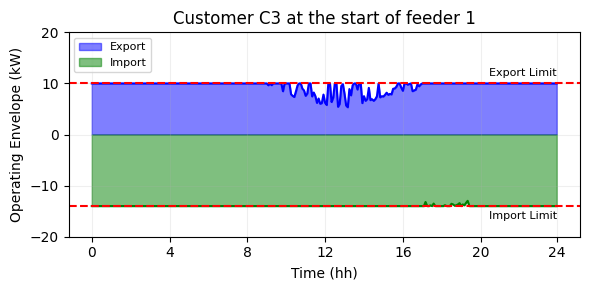

In [31]:
show_plot_calculated_oe(
    title="Customer C3 at the start of feeder 1",
    export_data=ideal_oe_prop_day_exp_values,
    import_data=-1*ideal_oe_prop_day_imp_values,
    customer_position=4,
    # save_name="Ideal-OE.png"
)

Given that all active customers have the same DER installed capacity (10kVA), the calculated OEs (shown in the figure above) is the same for all active customers. It is important to note that:
- This is the ideal operating envelope, thus it guarantees the network integrity at all times if followed.
- This OE is used as benchmark to the other simpler ones.
- The OE exports is lower during the day, when there is already PV generation on passive customers, forcing the OE to reduce.
- The OE imports is only reduced in the evening, when the imports on the network are already higher, forcing the OE to reduce.

##### Perfomance Check
Now the efficacy of the calculated OEs is shown.

<span style="color:red">**<u>Note</u>.</span>** All active customers are assumed to be using the full available OE value calculated for them.

Present various metrics showing the performance of the calculated OE export values for the considered day.


                    --------------- EXPORTS ---------------
                    
 The maximum voltage at customers: 253V (Right on the maximum voltage limit of 253V)
                    
 The network-wide voltage compliance: 100% (Above the recommended value of 95%)
                    
 The maximum utilisation of the distribution transformer: 46% (Below the maximum utilisation of 100%)
                    
 The maximum utilisation of the LV Head of Feeder: 57% (Below the maximum utilisation of 100%)
                


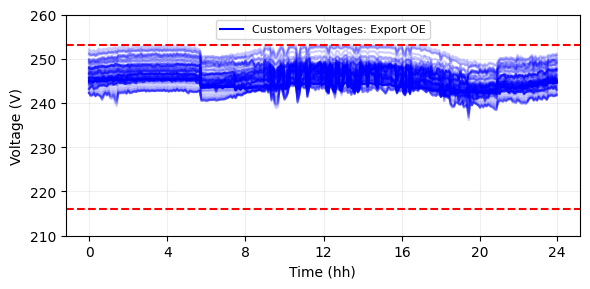

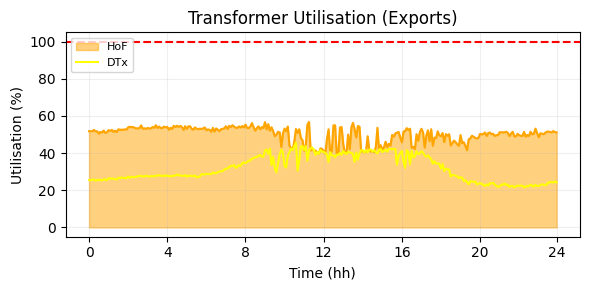

In [32]:
# The metrics are shown
show_metrics(
    title="EXPORTS",
    volt_all_cust=round(np.max(ideal_oe_prop_day_exp_volt_all_cust)),
    lv_tx_util=round(np.max(ideal_oe_prop_day_exp_lv_tx_util)),
    lv_hof_util=round(np.max(ideal_oe_prop_day_exp_lv_hof_util_max)),
    voltage_compliance=round(exp_voltage_compliance)
)

# plot the voltage at all customers
show_plot_voltages(
    data=ideal_oe_prop_day_exp_volt_all_cust,
    loads=load_list_prop,
    # fig_size=(6,6),
    save_name="Voltage-Export-OE.png"
)
# plot transformer utilisation
show_plot_utilisation(
    data=ideal_oe_prop_day_exp_lv_hof_util_max,
    data2 = ideal_oe_prop_day_exp_lv_tx_util,
    title="Transformer Utilisation (Exports)",
    y_title="Utilisation (%)",
    x_title="Time (hh)",
    # fig_size=(6,6),
    # save_name="Transformer-Utilisation-Export-OE.png"
)

Present various metrics showing the performance of the calculated OE import values for the considered day.


                    --------------- IMPORTS ---------------
                    
 The maximum voltage at customers: 221V (Above the maximum voltage limit of 216V)
                    
 The network-wide voltage compliance: 100% (Above the recommended value of 95%)
                    
 The maximum utilisation of the distribution transformer: 61% (Below the maximum utilisation of 100%)
                    
 The maximum utilisation of the LV Head of Feeder: 100% (Right on the maximum utilisation of 100%)
                


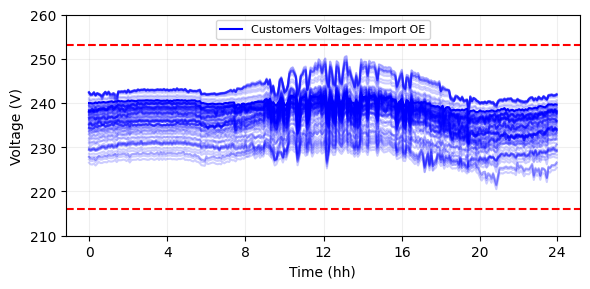

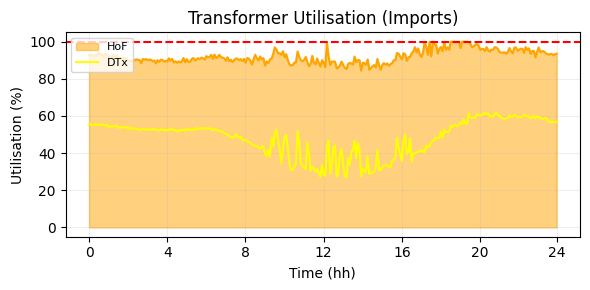

In [33]:
# The metrics are shown
show_metrics(
    title="IMPORTS",
    volt_all_cust=round(np.min(ideal_oe_prop_day_imp_volt_all_cust)),
    lv_tx_util=round(np.max(ideal_oe_prop_day_imp_lv_tx_util)),
    lv_hof_util=round(np.max(ideal_oe_prop_day_imp_lv_hof_util_max)),
    voltage_compliance=round(imp_voltage_compliance)
)

# plot the voltage at all customers
show_plot_voltages(
    data=ideal_oe_prop_day_imp_volt_all_cust,
    loads=load_list_prop,
    data_label="Customers Voltages: Import OE",
    # fig_size=(6,6)
    save_name="Voltage-Import-OE.png"
)
# plot transformer utilisation
show_plot_utilisation(
    data=ideal_oe_prop_day_imp_lv_hof_util_max,
    data2 = ideal_oe_prop_day_imp_lv_tx_util,
    title="Transformer Utilisation (Imports)",
    y_title="Utilisation (%)",
    x_title="Time (hh)",
    # fig_size=(6,6),
    # save_name="Transformer-Utilisation-Import-OE.png"
)

<span style="color:red">**<u>Note</u>.</span>** These metrics can be used to do comparisons with other OE implementations, but not all metrics used in the project are calculated here. For a complete performance analysis please refer to the final report of the project.

#### 5.3.2. Maximum Allocation
<a name="maximum-allocation"></a>

In [26]:
# load the entire LV network with transformer, feeders, loads, PV systems, PV inverter settings, demands, PV generation from opendss
load_list_max = load_network(path = mydir + added_path + mother_folder + file_name, time_res = time_resolution)

# initialise arrays to save the OE values for each time step of the day
ideal_oe_max_day_exp_values = np.zeros((len(names_active_cust), num_of_time_step), float) # for exports
ideal_oe_max_day_imp_values = np.zeros((len(names_active_cust), num_of_time_step), float) # for imports
ideal_oe_max_day_exp_lv_tx_util = np.zeros(num_of_time_step) # for exports
ideal_oe_max_day_imp_lv_tx_util = np.zeros(num_of_time_step) # for imports
ideal_oe_max_day_exp_lv_hof_util_max = np.zeros(num_of_time_step) # for exports
ideal_oe_max_day_imp_lv_hof_util_max = np.zeros(num_of_time_step) # for imports
ideal_oe_max_day_exp_volt_all_cust = np.zeros((len(load_list_max), num_of_time_step), float) # for exports
ideal_oe_max_day_imp_volt_all_cust = np.zeros((len(load_list_max), num_of_time_step), float) # for imports

# Calculate the OE values for each time step of the day in a for loop
for itime in range(num_of_time_step):
    # Set vsource with the distribution transformer voltage magnitudes and angles for the time step at the primary side
    update_vsource(itime)

    dss_solution.Solve() # solve the power flow in OpenDSS

    # call the ideal OE proportional allocation functions to calculate the OE value to each time step
    (ideal_oe_max_day_exp_values[:,itime], ideal_oe_max_day_exp_lv_tx_util[itime],
     ideal_oe_max_day_exp_lv_hof_util_max[itime], ideal_oe_max_day_exp_volt_all_cust[:, itime]) = (
        ideal_oe_algorithm(active_customers=names_active_cust,allocation_method='maximum',direction='exports',oe_step_size_percentage=oe_step_size_perc))
    (ideal_oe_max_day_imp_values[:,itime], ideal_oe_max_day_imp_lv_tx_util[itime],
     ideal_oe_max_day_imp_lv_hof_util_max[itime], ideal_oe_max_day_imp_volt_all_cust[:, itime]) = (
        ideal_oe_algorithm(active_customers=names_active_cust,allocation_method='maximum',direction='imports',oe_step_size_percentage=oe_step_size_perc))

    # Reset active customers to profile values for the next time step
    reset_active_customers()

exp_voltage_compliance = check_voltage_compliance(len(load_list_max), ideal_oe_max_day_exp_volt_all_cust)
imp_voltage_compliance = check_voltage_compliance(len(load_list_max), ideal_oe_max_day_imp_volt_all_cust)

##### 5.3.2.1. Results Analysis

Create a two figures to show the calculated OE values (exports/imports) of two customers for the entire day.

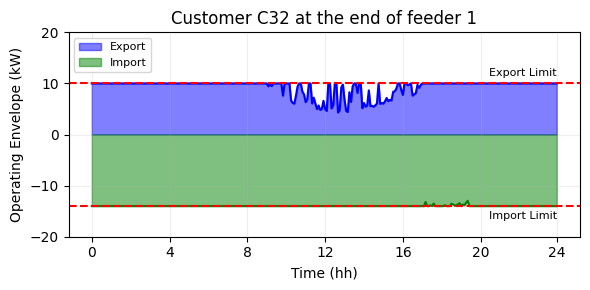

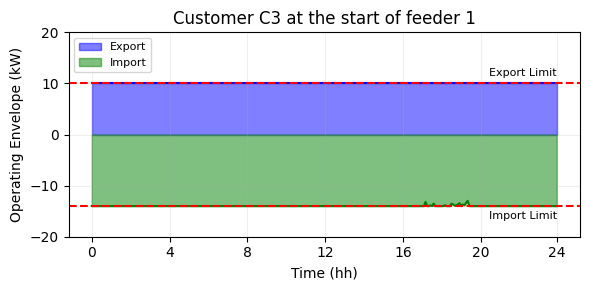

In [27]:
# plot the calculated operating envelopes for customer at the end of feeder 1
show_plot_calculated_oe(
    export_data=[ideal_oe_max_day_exp_values[i,:] for i in range(len(names_active_cust))],
    import_data=[-1*ideal_oe_max_day_imp_values[i,:] for i in range(len(names_active_cust))],
    customer_position=4,
    title="Customer C32 at the end of feeder 1"
)

# plot the calculated operating envelopes at the start of feeder 1
show_plot_calculated_oe(
    export_data=[ideal_oe_max_day_exp_values[i,:] for i in range(len(names_active_cust))],
    import_data=[-1*ideal_oe_max_day_imp_values[i,:] for i in range(len(names_active_cust))],
    customer_position=0,
    title="Customer C3 at the start of feeder 1"
)

The Ideal OE maximum allocation gives a different OE for each customer (see figures above), because it only reduces the OE of the most affected customers in terms of voltages (customers at the end of feeders). It is important to note that:
- This is the ideal operating envelope, thus it guarantees the network integrity at all times if followed.
- The OE exports is only reduced for customers towards the end of the feeders, which are impacted by voltage rise. It is lower during the day, when there is already PV generation on passive customers, forcing the OE to reduce.
- The OE imports is reduced to all customers because the constraint is thermal. It is only reduced in the evening, when the imports on the network are already higher, forcing the OE to reduce.

##### Perfomance Check
Now the efficacy of the calculated OEs is shown.

<span style="color:red">**<u>Note</u>.</span>** All active customers are assumed to be using the full available OE value calculated for them.

Present various metrics showing the performance of the calculated OE export values for the considered day.


                    --------------- EXPORTS ---------------
                    
 The maximum voltage at customers: 253V (Right on the maximum voltage limit of 253V)
                    
 The network-wide voltage compliance: 100% (Above the recommended value of 95%)
                    
 The maximum utilisation of the distribution transformer: 52% (Below the maximum utilisation of 100%)
                    
 The maximum utilisation of the LV Head of Feeder: 59% (Below the maximum utilisation of 100%)
                


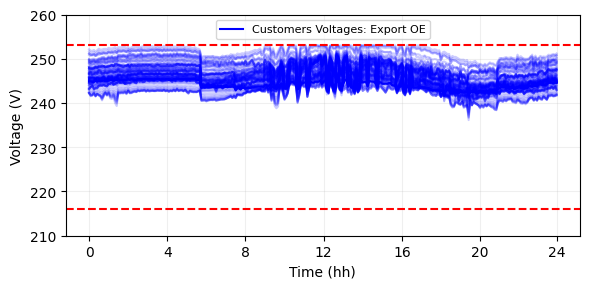

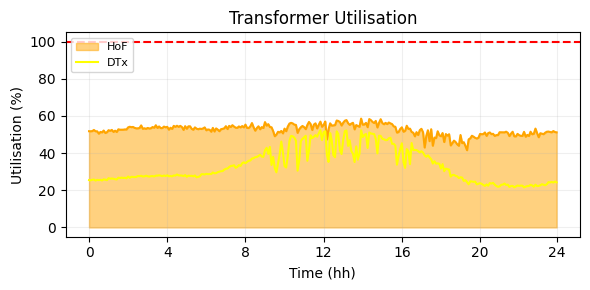

In [28]:
# show the metrics
show_metrics(
    title="EXPORTS",
    volt_all_cust=round(np.max(ideal_oe_max_day_exp_volt_all_cust)),
    lv_tx_util=round(np.max(ideal_oe_max_day_exp_lv_tx_util)),
    lv_hof_util=round(np.max(ideal_oe_max_day_exp_lv_hof_util_max)),
    voltage_compliance=round(exp_voltage_compliance)
)

# plot the voltage at all customers
show_plot_voltages(
    data=ideal_oe_max_day_exp_volt_all_cust,
    loads=load_list_max
)
# plot transformer utilisation
show_plot_utilisation(
    data=ideal_oe_max_day_exp_lv_hof_util_max,
    data2 = ideal_oe_max_day_exp_lv_tx_util,
    title="Transformer Utilisation",
    y_title="Utilisation (%)",
    x_title="Time (hh)"
)

Present various metrics showing the performance of the calculated OE import values for the considered day.


                    --------------- IMPORTS ---------------
                    
 The maximum voltage at customers: 221V (Above the maximum voltage limit of 216V)
                    
 The network-wide voltage compliance: 100% (Above the recommended value of 95%)
                    
 The maximum utilisation of the distribution transformer: 62% (Below the maximum utilisation of 100%)
                    
 The maximum utilisation of the LV Head of Feeder: 100% (Right on the maximum utilisation of 100%)
                


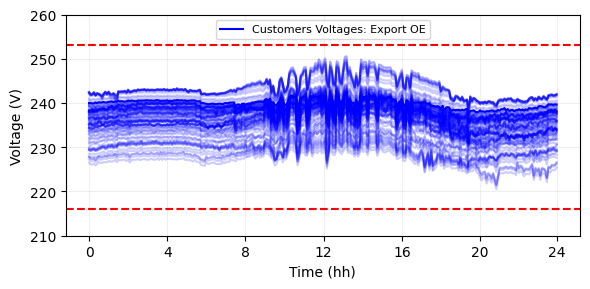

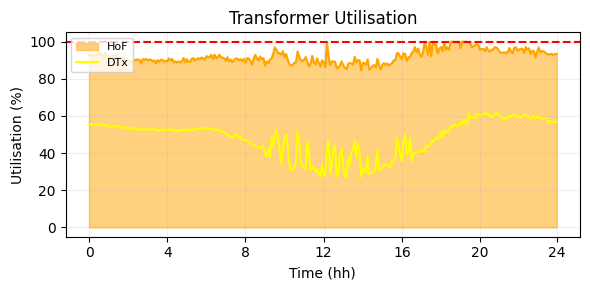

In [29]:
# show the metrics
show_metrics(
    title="IMPORTS",
    volt_all_cust=round(np.min(ideal_oe_max_day_imp_volt_all_cust)),
    lv_tx_util=round(np.max(ideal_oe_max_day_imp_lv_tx_util)),
    lv_hof_util=round(np.max(ideal_oe_max_day_imp_lv_hof_util_max)),
    voltage_compliance=round(imp_voltage_compliance)
)

# plot the voltage at all customers
show_plot_voltages(
    data=ideal_oe_max_day_imp_volt_all_cust,
    loads=load_list_max
)
# plot transformer utilisation
show_plot_utilisation(
    data=ideal_oe_max_day_imp_lv_hof_util_max,
    data2 = ideal_oe_max_day_imp_lv_tx_util,
    title="Transformer Utilisation",
    y_title="Utilisation (%)",
    x_title="Time (hh)"
)

<span style="color:red">**<u>Note</u>.</span>** These metrics can be used to do comparisons with other OE implementations, but not all metrics used in the project are calculated here. For a complete performance analysis please refer to the final report of the project.